In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [117]:
raw = pd.read_csv("../data/Data.csv")

In [118]:
raw.head()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB,Response
0,1,0.0,0.0,0.009140,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,177.331194,0.971717,0.430281,11.980651,0.0,A,60.062861
1,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86.098721,0.0,184.539779,1.040365,0.477488,13.452968,0.0,B,19.350732
2,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,184.230167,0.0,181.902155,0.961431,0.412368,12.952387,0.0,C,20.227076
3,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,197.748133,1.125438,0.533366,10.863085,0.0,B,38.798884
4,5,0.0,0.0,0.003537,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,176.839320,0.0,168.942908,0.981250,0.466690,11.472632,0.0,B,58.174574


In [119]:
raw.describe()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,4420.000000,6359.000000,6354.000000,6358.000000,6355.000000,6359.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,3180.500000,0.001366,0.001741,0.007894,0.000502,0.000788,0.003949,0.001320,0.003386,0.000054,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,1836.118188,0.108920,0.044628,0.009345,0.013817,0.016883,0.088927,0.025589,0.080741,0.002789,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,1590.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,3180.500000,0.000000,0.000000,0.003494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,4770.250000,0.000000,0.000000,0.015044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,6360.000000,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [120]:
raw.isnull().sum()

Unnamed: 0         0
ingredient_1       0
ingredient_2       0
ingredient_3    1940
ingredient_4       1
                ... 
Group13_63         0
Group13_64         0
Group13_65         0
LAB                0
Response           0
Length: 811, dtype: int64

In [121]:
raw.isnull().sum().sum()

11694

In [122]:
# blind replace with 0
raw.fillna(0, inplace=True)

In [123]:
raw.isnull().sum().sum()

0

In [124]:
raw.drop(columns=['Unnamed: 0'], inplace=True)

In [125]:
raw.describe()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,0.001366,0.001741,0.005486,0.000502,0.000787,0.003948,0.001319,0.003386,0.000054,0.000419,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,0.108920,0.044628,0.008597,0.013816,0.016875,0.088913,0.025579,0.080734,0.002789,0.015540,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,0.000000,0.000000,0.009876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,0.732679,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [126]:
raw = raw.rename(columns={'Response': 'targetVar'})

In [127]:
categorical_columns = ['LAB']
raw[categorical_columns] = raw[categorical_columns].astype('category')

In [128]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(raw.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [129]:
if targetCol == totCol:
    X_raw = raw.iloc[:,0:totAttr]
    y_raw = raw.iloc[:,totAttr]
else:
    X_raw = raw.iloc[:,1:totCol]
    y_raw = raw.iloc[:,0]

print("Total shape: {} X shape: {} y shape: {}".format(raw.shape, X_raw.shape, y_raw.shape))

Total shape: (6360, 810) X shape: (6360, 809) y shape: (6360,)


In [130]:
X_raw = pd.get_dummies(X_raw)
print(X_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Columns: 811 entries, ingredient_1 to LAB_C
dtypes: float64(808), uint8(3)
memory usage: 39.2 MB
None


# Splitting into test train and validation

In [131]:
# Split the data further into training, validation, and test datasets
test_size = 0.2
test_size_validation = 0.1
randomseed = 12345

X_train_val, X_test_df, y_train_val, y_test_df = train_test_split(X_raw, y_raw, test_size=test_size, random_state=randomseed)
X_train_df, X_validation_df, y_train_df, y_validation_df = train_test_split(X_train_val, y_train_val, test_size=test_size_validation, random_state=randomseed)
print("X_train_df.shape: {} y_train_df.shape: {}".format(X_train_df.shape, y_train_df.shape))
print("X_validation_df.shape: {} y_validation_df.shape: {}".format(X_validation_df.shape, y_validation_df.shape))
print("X_test_df.shape: {} y_test_df.shape: {}".format(X_test_df.shape, y_test_df.shape))

X_train_df.shape: (4579, 811) y_train_df.shape: (4579,)
X_validation_df.shape: (509, 811) y_validation_df.shape: (509,)
X_test_df.shape: (1272, 811) y_test_df.shape: (1272,)


In [132]:
# scaling
columns_to_scale = X_train_df.columns[X_train_df.dtypes == 'float64'].tolist()
scaler = preprocessing.StandardScaler()
X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])

# do the same to the validation set
scaled_features = scaler.transform(X_validation_df[columns_to_scale])
X_validation_df.loc[:,tuple(columns_to_scale)] = scaled_features

scaled_features = scaler.transform(X_test_df[columns_to_scale])
X_test_df.loc[:,tuple(columns_to_scale)] = scaled_features

<ipython-input-132-e897c2b08841>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [133]:
X_train_df.head()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB_A,LAB_B,LAB_C
2820,0.0,-0.037115,0.712768,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.345579,-0.070617,-0.045154,-0.057585,0.156290,-0.681774,-0.112395,0,1,0
5304,0.0,-0.037115,-0.473920,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.040850,-0.634499,-0.688080,0.214289,-0.112395,0,1,0
1887,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.330444,-0.070617,0.266605,0.158301,0.054966,-0.005877,-0.112395,1,0,0
4485,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,0.795570,-0.070617,0.089735,-0.054156,-0.206578,0.874604,-0.112395,0,1,0
964,0.0,-0.037115,-0.543481,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.477494,-1.813477,-1.475231,-0.249065,-0.112395,0,1,0


## Attribute Importance Ranking

In [134]:
# Feature Importance with Gradient Boosting Regressor
X_impVal = X_train_df.values
y_impVal = y_train_df.values.ravel()
model = GradientBoostingRegressor()
model.fit(X_impVal, y_impVal)
importanceScore = model.feature_importances_
attributeList = X_train_df.columns.tolist()
attributeImportance = pd.DataFrame({'attribute': attributeList, 'importance': importanceScore})
rankedAttributes = attributeImportance.sort_values('importance', ascending=False)
print(rankedAttributes)

          attribute  importance
486       Group1_11    0.569850
526       Group2_20    0.073504
745       Group13_3    0.043404
509        Group2_3    0.038112
484        Group1_9    0.034432
..              ...         ...
297  ingredient_298    0.000000
298  ingredient_299    0.000000
299  ingredient_300    0.000000
300  ingredient_301    0.000000
405  ingredient_406    0.000000

[811 rows x 2 columns]


<BarContainer object of 811 artists>

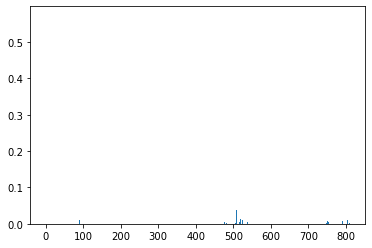

In [135]:
plt.bar([i for i in range(len(importanceScore))], importanceScore)

In [136]:
# Set the importance threshold and calculate the list of attributes that don't contribute to the importance threshold
importanceSum = sum(importanceScore)
maxThreshold = 0.99
i = 0
accumWeight = 0
exit_now = False
while ((i < totAttr) and (not exit_now)) :
    accumWeight = accumWeight + (rankedAttributes.iloc[i]['importance']/importanceSum)
    if (accumWeight >= maxThreshold) :
        exit_now = True
    else :
        i = i + 1
print('Number of attributes contributed to the importance threshold:'+str(i))
lowAttributes = rankedAttributes.iloc[(i):(totAttr),]['attribute'].tolist()
print('Number of attributes found to be of low importance:',len(lowAttributes))
print(lowAttributes)


Number of attributes contributed to the importance threshold:98
Number of attributes found to be of low importance: 711
['Group13_44', 'ingredient_297', 'Group2_14', 'ingredient_305', 'Group2_6', 'Group9_50', 'ingredient_13', 'Group10_5', 'ingredient_350', 'Group10_7', 'Group13_13', 'ingredient_283', 'Group9_49', 'ingredient_50', 'ingredient_197', 'Group2_44', 'Group8_14', 'Group13_48', 'ingredient_79', 'ingredient_256', 'ingredient_268', 'Group2_45', 'Group3_3', 'Group13_38', 'Group8_18', 'Group2_4', 'Group2_25', 'Group9_57', 'ingredient_466', 'Group10_4', 'Group13_39', 'ingredient_11', 'Group11_5', 'Group8_7', 'ingredient_329', 'Group9_37', 'Group1_19', 'Group9_24', 'Group8_8', 'ingredient_20', 'ingredient_460', 'Group9_52', 'ingredient_86', 'Group13_18', 'Group9_61', 'ingredient_6', 'Group3_9', 'ingredient_351', 'Group8_19', 'ingredient_471', 'ingredient_277', 'ingredient_446', 'Group9_7', 'ingredient_55', 'ingredient_120', 'Group8_9', 'ingredient_464', 'ingredient_360', 'ingredient

LAB C is deemed to be an important attribute

In [137]:
# Removing the unselected attributes from the training and validation dataframes
X_train_df.drop(labels=lowAttributes, axis=1, inplace=True)
X_test_df.drop(labels=lowAttributes, axis=1, inplace=True)
X_validation_df.drop(labels=lowAttributes, axis=1, inplace=True)

C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [138]:
# Finalize the training and validation datasets for the modeling activities
X_train = X_train_df.to_numpy()
y_train = y_train_df.ravel()
X_validation = X_validation_df.to_numpy()
y_validation = y_validation_df.ravel()
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_validation.shape: {} y_validation.shape: {}".format(X_validation.shape, y_validation.shape))

X_train.shape: (4579, 100) y_train.shape: (4579,)
X_validation.shape: (509, 100) y_validation.shape: (509,)


In [139]:
# save it as a file
file_name = "../data/lubrizol-AIR.h5"
X_train_df.to_hdf(file_name, key='X_train', mode='w', format='t')
X_test_df.to_hdf(file_name, key='X_test', append=True, format='t')
X_validation_df.to_hdf(file_name, key='X_validation', append=True, format='t')
y_train_df.to_hdf(file_name, key='y_train', append=True, format='t')
y_test_df.to_hdf(file_name, key='y_test', append=True, format='t')
y_validation_df.to_hdf(file_name, key='y_validation', append=True, format='t')

In [140]:
X_test = X_test_df.to_numpy()
y_test = y_test_df.ravel()
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_test.shape: (1272, 100) y_test.shape: (1272,)


In [141]:
## Regression Modelling

In [142]:
theil = linear_model.TheilSenRegressor(n_jobs=-1)

theil.fit(X_train, y_train)

TheilSenRegressor(max_subpopulation=10000, n_jobs=-1)

In [143]:
# score with training data
theil.score(X_train, y_train)

-1.2928575015362735

In [144]:
# score with test data
theil.score(X_test, y_test)

-1.1194702685678797

In [145]:
y_hat = theil.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('R^2: {0}'.format(r2))

MAE: 9.205191166085784
R^2: -1.1194702685678797


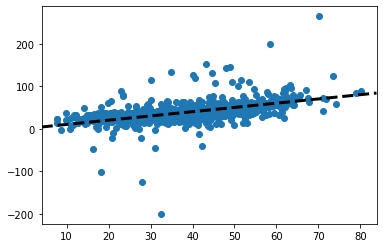

In [146]:
# plot test predicted vs true
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [147]:
# a new method

# Correlation Feature Selection
Which features directly correlate to increase / decrease in response variable

In [148]:
# correlation feature selection
def select_correlation_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [149]:
# feature selection
X_train_fs, X_test_fs, fs = select_correlation_features(X_train, y_train, X_test)


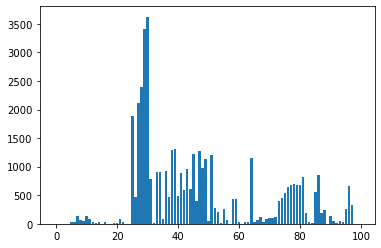

In [150]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Mutual Information Gain
Measuring the reduction of uncertainty for one variable given a known value of the other variable

In [151]:
# mutual info feature selection
def select_mutual_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [152]:
# feature selection
X_train_fs, X_test_fs, fs = select_mutual_features(X_train, y_train, X_test)

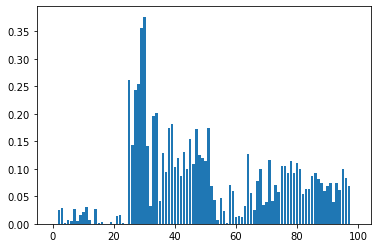

In [153]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# New Models w/ Feature Selection

MAE: 5.489443840321535
MSE: 50.47322127984631
R^2: 0.6646157609032867


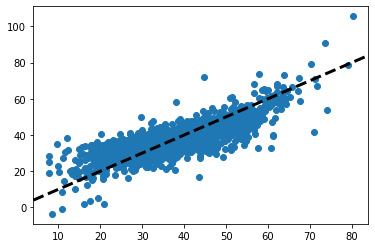

In [154]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 5.489443840321535
MSE: 50.47322127984631
R^2: 0.6646157609032867


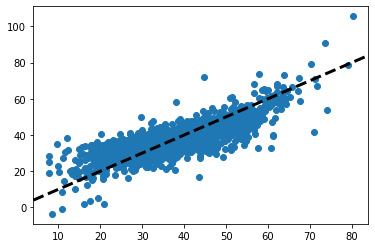

In [155]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [156]:
print(y_hat)

[42.78226362 45.46146776 43.82054982 ... 36.22225059 45.75712932
 60.70052254]


MAE: 5.57948753460873
MSE: 51.551217605360264
R^2: 0.6574526956537557


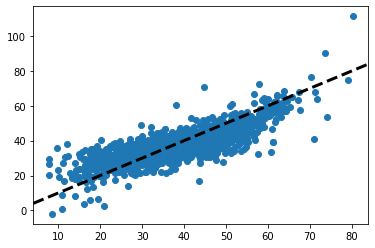

In [157]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 5.555111644913605
MSE: 51.04795997637707
R^2: 0.6607967397366632


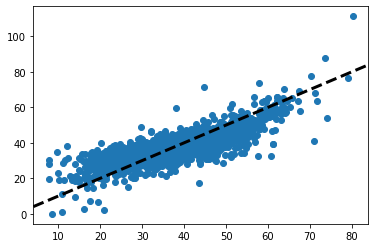

In [158]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train_fs, y_train)
# evaluate the model
y_hat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# Validator 

## Full Dataset

In [159]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.8s finished


Best: -5.467246 using {'n_estimators': 150}
-5.782404 (0.125712) with: {'n_estimators': 10}
-5.486630 (0.074652) with: {'n_estimators': 50}
-5.471281 (0.107253) with: {'n_estimators': 100}
-5.467246 (0.087051) with: {'n_estimators': 150}
-5.469006 (0.077008) with: {'n_estimators': 200}


In [160]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 150


In [162]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print("Mean Squared Error:", mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=150, n_jobs=-1)
Mean Absolute Error: 4.984256678671063
Mean Squared Error: 44.23610374322856
R^2 Score: 0.738876679780041


In [167]:
# Combining the training and validation datasets to form the complete dataset that will be used for training the final model
X_complete = np.vstack((X_train, X_validation))
y_complete = np.concatenate((y_train, y_validation))
print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))
test_model = validation_model.fit(X_complete, y_complete)
print(test_model)

X_complete.shape: (5088, 100) y_complete.shape: (5088,)
ExtraTreesRegressor(n_estimators=150, n_jobs=-1)


In [168]:
test_predictions = test_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.17115905156264
Mean Squared Error: 46.34416508403506
R^2 Score: 0.6920524953796074


In [169]:
## Feature Selected

In [170]:
# mutual info feature selection
def select_mutual_features_validation(X_train, y_train, X_test, X_validation):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    # transform validation input data
    X_validation_fs = fs.transform(X_validation)
    return X_train_fs, X_test_fs, X_validation_fs, fs

In [171]:
# create feature selected versions
X_train_fs, X_test_fs, X_validation_fs, fs = select_mutual_features_validation(X_train, y_train, X_test, X_validation)

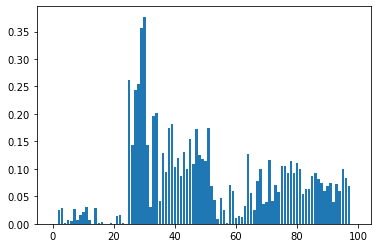

In [172]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [173]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train_fs, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.7s finished


Best: -5.463079 using {'n_estimators': 200}
-5.662312 (0.161469) with: {'n_estimators': 10}
-5.499572 (0.177203) with: {'n_estimators': 50}
-5.486930 (0.184650) with: {'n_estimators': 100}
-5.466842 (0.183736) with: {'n_estimators': 150}
-5.463079 (0.198881) with: {'n_estimators': 200}


In [174]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 200


In [175]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train_fs, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation_fs)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print("Mean Squared Error:", mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
Mean Absolute Error: 4.9887397633354675
Mean Squared Error: 43.969310019104896
R^2 Score: 0.7404515486577659


In [177]:
test_predictions = test_model.predict(X_test_fs)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.171159051562639
Mean Squared Error: 46.34416508403506
R^2 Score: 0.6920524953796074
